<a href="https://colab.research.google.com/github/MalikHasnat1999/ZTM_Tensorflow/blob/master/05_Transfer_Learning_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import datetime
import zipfile
import datetime
import matplotlib.pyplot as plt


# Create Helper function

 # 150.Load the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-08-24 10:44:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  72.5MB/s    in 2.2s    

2021-08-24 10:44:40 (72.5 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
def unzip_file(filename):
  zip_ref = zipfile.ZipFile(filename)
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip_file("10_food_classes_10_percent.zip")

In [ ]:
def wallk_through(filename):
  for dirpath, dirnames, filenames in os.walk(filename):
    print(f"There are {len(filenames)} imaegs in '{dirpath}'")

In [ ]:
wallk_through("10_food_classes_10_percent")

There are 0 imaegs in '10_food_classes_10_percent'
There are 0 imaegs in '10_food_classes_10_percent/train'
There are 75 imaegs in '10_food_classes_10_percent/train/pizza'
There are 75 imaegs in '10_food_classes_10_percent/train/fried_rice'
There are 75 imaegs in '10_food_classes_10_percent/train/grilled_salmon'
There are 75 imaegs in '10_food_classes_10_percent/train/steak'
There are 75 imaegs in '10_food_classes_10_percent/train/sushi'
There are 75 imaegs in '10_food_classes_10_percent/train/chicken_curry'
There are 75 imaegs in '10_food_classes_10_percent/train/hamburger'
There are 75 imaegs in '10_food_classes_10_percent/train/ramen'
There are 75 imaegs in '10_food_classes_10_percent/train/chicken_wings'
There are 75 imaegs in '10_food_classes_10_percent/train/ice_cream'
There are 0 imaegs in '10_food_classes_10_percent/test'
There are 250 imaegs in '10_food_classes_10_percent/test/pizza'
There are 250 imaegs in '10_food_classes_10_percent/test/fried_rice'
There are 250 imaegs in '

In [ ]:
# set the train test path object
train_dir = "/content/10_food_classes_10_percent/train" 
test_dir = "/content/10_food_classes_10_percent/test"

## image_dataset_from_directory()

same as ImageDataGenerator

In [ ]:
IMAGE_SIZE=(224,224)
BATCH_SIZE=32
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMAGE_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
# see an example of batch of data
for images, labels in train_data.take(1): # take 1 batch of train_data
  print(images, labels)


# the data shown is not Normalized 
# we need to normalize the data before we create the model

tf.Tensor(
[[[[1.63571434e+01 2.73571415e+01 4.85306129e+01]
   [1.13112230e+01 2.23112240e+01 4.04540787e+01]
   [9.00000000e+00 2.10000000e+01 3.50000000e+01]
   ...
   [2.04234982e+01 3.19949703e+01 5.66377640e+01]
   [1.19999866e+01 2.50255013e+01 4.18775139e+01]
   [1.05866871e+01 2.45866871e+01 3.68723335e+01]]

  [[2.15663261e+01 2.89030609e+01 4.90408173e+01]
   [1.52806110e+01 2.40765305e+01 4.13622398e+01]
   [1.17142859e+01 2.05153065e+01 3.51173477e+01]
   ...
   [1.36989365e+01 2.34999771e+01 5.07856483e+01]
   [7.06632519e+00 2.00663261e+01 3.89183388e+01]
   [8.33166504e+00 2.13571777e+01 3.78775482e+01]]

  [[1.28571434e+01 1.74285698e+01 3.67091827e+01]
   [1.34132652e+01 1.79846935e+01 3.65867348e+01]
   [1.94744892e+01 2.48316326e+01 4.07091827e+01]
   ...
   [5.76527214e+00 1.55969219e+01 4.29336205e+01]
   [1.20561199e+01 2.21122532e+01 4.69438553e+01]
   [1.09234972e+01 2.28521023e+01 4.44234276e+01]]

  ...

  [[1.83315411e+01 1.53315411e+01 9.90301323e+00]
   [2

In [ ]:
def tensorboard_callback(log_dir, experiment_name):
  LOG_DIR = log_dir + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%y%m%d - %h%m%s")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)
  print(f"Saving model logs to {LOG_DIR}")

# Functional API

The sequential API is straight-forward, it runs our model in sequential order

But the Functional API gives us more Flexibility


In [ ]:
# 1. Create the base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model(so the underlying pre-trained patterns aren't updated)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. if you are using RESNET50V2 you need to normalize the inputs
# x = tf.keras.layer.experimental.preprocessing.Rescaling(1/255.)(inputs)

# 5. pass the inputs to the base model
x = base_model(inputs)
print(f"Shape after passing through the input model {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computation )
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_poolig_layer")(x)
print(f"Shape After GlobalAveragePoolinng {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. compile the model
model_0.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# 10. fit the model
model_0_histroy = model_0.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data),
                              callbacks=tensorboard_callback("tensorboard_hub",
                                                             "model_0"))


16719872/16705208 [==============================] - 0s 0us/step
Shape after passing through the input model (None, 7, 7, 1280)
Shape After GlobalAveragePoolinng (None, 1280)
Saving model logs to tensorboard_hub/model_0/210824 - Aug081629801894
Epoch 1/5
24/24 [==============================] - 51s 687ms/step - loss: 1.8624 - accuracy: 0.4373 - val_loss: 1.3200 - val_accuracy: 0.7296
Epoch 2/5
24/24 [==============================] - 14s 578ms/step - loss: 1.1184 - accuracy: 0.7533 - val_loss: 0.9080 - val_accuracy: 0.7992
Epoch 3/5
24/24 [==============================] - 14s 576ms/step - loss: 0.8188 - accuracy: 0.8053 - val_loss: 0.7419 - val_accuracy: 0.8200
Epoch 4/5
24/24 [==============================] - 14s 578ms/step - loss: 0.6799 - accuracy: 0.8387 - val_loss: 0.6578 - val_accuracy: 0.8232
Epoch 5/5
24/24 [==============================] - 14s 575ms/step - loss: 0.5909 - accuracy: 0.8627 - val_loss: 0.6052 - val_accuracy: 0.8360


In [ ]:
# evaluate the data
model_0.evaluate(test_data)

79/79 [==============================] - 11s 129ms/step - loss: 0.6052 - accuracy: 0.8360


[0.6052293181419373, 0.8360000252723694]

In [ ]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_poolig_layer  (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# plot loss curve
def plot_loss_curve(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(12,6))

  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.xlabel("Epochs")
  plt.ylabel("loss")
  plt.title("Loss Curve")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.title("Accuracy Curve")
  plt.legend()

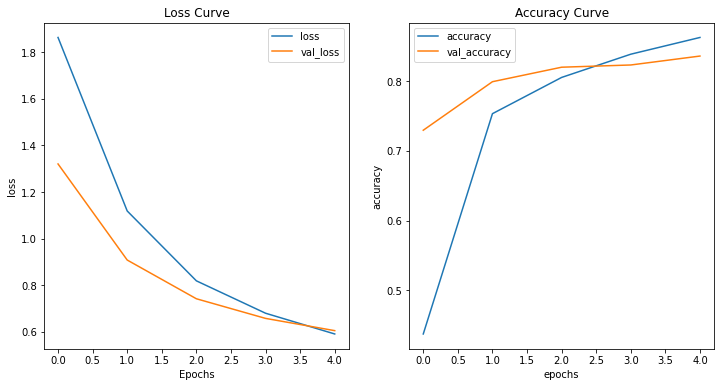

In [ ]:
plot_loss_curve(model_0_histroy)

# Getting a Feature Vector from a trained model

## GlobalAveragePooling2D

returns a **feature_vector**

In [ ]:
# Define the input shape
input_shape =  (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor} \n")

# pass the random tensor through the global average pooling 2D layer
global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D() (input_tensor)
print(f"2D global Average pooling random tensor: \n {global_average_pooling_layer} \n")

# check the shape of the differet tensor
print(f"input_tensor shape : {input_tensor.shape}")
print(f"GlobalAveragePooling2D shape : {global_average_pooling_layer.shape}")


Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D global Average pooling random tensor: 
 [[-0.09368646 -0.45840448 -0.2885598 ]] 

input_tensor shape : (1, 4, 4, 3)
GlobalAveragePooling2D shape : (1, 3)


## GlobalMaxPooling2D

returns a **feature_vector**

In [ ]:
input_shape = (1,4,4,3)

# create the random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random Tensor: \n{input_tensor}\n")

# pass the input tensor through the GlobalMaxPooling2D
global_max_pooling_layer = tf.keras.layers.GlobalMaxPooling2D() (input_tensor)
print(f"GlobalMaxPooling2D : \n{global_max_pooling_layer}\n")

# print the shape of different layer
print(f"input_tensor shape: {input_tensor.shape}\n")
print(f"GlobalMaxPooling2D shape: {global_max_pooling_layer.shape}\n")

Random Tensor: 
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

GlobalMaxPooling2D : 
[[0.9058464 1.1603122 1.6994323]]

input_tensor shape: (1, 4, 4, 3)

GlobalMaxPooling2D shape: (1, 3)



**NOTE** One of the reasons feature extraction transfer learning is named how it is, is because what often happens is pretrained model outpus a **feature vector** (a long tensor of numbers which represent the learned representation of the model on a partcular sample, in our case, this is the output of the `tf.keras.layers.GlobalAveragePool2D()` layer) which can then be used to extract patterns out of our own specific probelm

# Running a series of transfer learning experiments

1. `model_1` - use feature extraction transfer learning on 1% of the training data with data augmentation 
2. `model_2` - use feature extraction transfer learning on 10% of the training data and data augmentation
3. `model_3` - use fine-tuning transfer learning on 10% of the training data and data augmentation
4. `model_4` - use fine-tuning transfer learning on 100% of the training data and data augmentation 


## 158).`model_1`: use feature extraction transfer learning on 1% of the training data with data augmentation 


In [ ]:
# download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_file("10_food_classes_1_percent.zip")

--2021-08-24 10:47:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  72.9MB/s    in 1.7s    

2021-08-24 10:47:46 (72.9 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
wallk_through("10_food_classes_1_percent")

There are 0 imaegs in '10_food_classes_1_percent'
There are 0 imaegs in '10_food_classes_1_percent/train'
There are 7 imaegs in '10_food_classes_1_percent/train/pizza'
There are 7 imaegs in '10_food_classes_1_percent/train/fried_rice'
There are 7 imaegs in '10_food_classes_1_percent/train/grilled_salmon'
There are 7 imaegs in '10_food_classes_1_percent/train/steak'
There are 7 imaegs in '10_food_classes_1_percent/train/sushi'
There are 7 imaegs in '10_food_classes_1_percent/train/chicken_curry'
There are 7 imaegs in '10_food_classes_1_percent/train/hamburger'
There are 7 imaegs in '10_food_classes_1_percent/train/ramen'
There are 7 imaegs in '10_food_classes_1_percent/train/chicken_wings'
There are 7 imaegs in '10_food_classes_1_percent/train/ice_cream'
There are 0 imaegs in '10_food_classes_1_percent/test'
There are 250 imaegs in '10_food_classes_1_percent/test/pizza'
There are 250 imaegs in '10_food_classes_1_percent/test/fried_rice'
There are 250 imaegs in '10_food_classes_1_percent

In [ ]:
train_dir = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [ ]:
# setup data loaders
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMAGE_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


To add augmentation layer right into our model we use the layer inside:

`tf.keras.layers.experimental.preprocessing`

Benefits of using data augmentaion
* preprocessing of images (augmented) happens on GPU(much faster) rather on CPU
* Image data augmentation happens only during training, so we can still export our whole model and use it elsewhere.

In [ ]:
# Adding data augmentation right into the model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmented model as layer with horizontal flipping, rotation and zooming etc
data_augmentation = keras.Sequential([
      preprocessing.RandomFlip("horizontal"),
      preprocessing.RandomRotation(0.2),
      preprocessing.RandomZoom(0.2),
      preprocessing.RandomHeight(0.2),
      preprocessing.RandomWidth(0.2)
    # preprocessing.Rescalling(1/255.) # Keep for model like ResNet50V2
      
], name="data_augmentation")


Orignal Image Shape : (384, 512, 3)
Augmented Image Shape : (414, 520, 3)


(-0.5, 519.5, 413.5, -0.5)

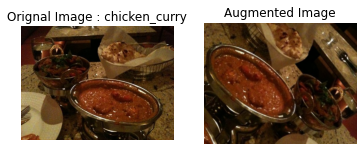

In [ ]:
# plot random images of orignal and augmented data
import random
import os


random_class = random.choice(os.listdir("10_food_classes_1_percent/train"))
random_class_path = "10_food_classes_1_percent/train/" + random_class
random_image = random.choice(os.listdir(random_class_path))
random_image_path = random_class_path + "/" + random_image

# read in the image
img = plt.imread(random_image_path)

# plot Orignal Image
plt.subplot(1,2,1)
plt.imshow(img)
plt.title(f"Orignal Image : {random_class}")
print(f"Orignal Image Shape : {img.shape}")
plt.axis(False)

# Augmented Image
plt.subplot(1,2,2)
aug_img = data_augmentation(img)
plt.imshow(aug_img/255.) # img must be normalized
print(f"Augmented Image Shape : {aug_img.shape}")
plt.title("Augmented Image")
plt.axis(False)

In [ ]:
# setup input_shape and base_model, freeze the base model layers
input_shape=(224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

# Create input layers
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# Add in Data Augmentation Sequential model as a layer
x = data_augmentation(inputs)

# give base_model the inputs (after augentation) and do not train it
x = base_model(x, training=False)

# pool output features of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="GlobalAveragePooling_layer")(x)

# create output layer as dense
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# make a model usnig inputs and outputs
model_1 = tf.keras.Model(inputs, outputs)

# compile the model
model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)
# fit the model
model_1_history = model_1.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=(0.25*len(test_data)),
                              # track model training
                              callbacks=tensorboard_callback("tensorboard_hub",
                                                             "model_1"))

Saving model logs to tensorboard_hub/model_1/210824 - Aug081629802071
Epoch 1/5
3/3 [==============================] - 14s 3s/step - loss: 2.4228 - accuracy: 0.1429 - val_loss: 2.2537 - val_accuracy: 0.1547
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1876 - accuracy: 0.2000 - val_loss: 2.1461 - val_accuracy: 0.2266
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9702 - accuracy: 0.3571 - val_loss: 2.0505 - val_accuracy: 0.2797
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.8463 - accuracy: 0.4857 - val_loss: 1.9479 - val_accuracy: 0.3500
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.6507 - accuracy: 0.6286 - val_loss: 1.8706 - val_accuracy: 0.3984


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, 3)           0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
GlobalAveragePooling_layer ( (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


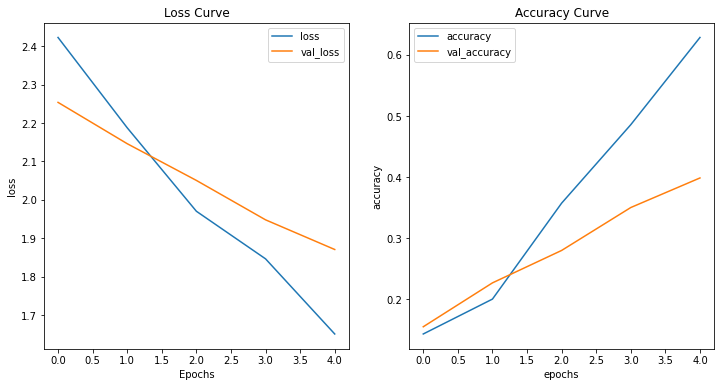

In [ ]:
plot_loss_curve(model_1_history)

## 162).`model_2`: use feature extraction transfer learning on 10% of the training data and data augmentation

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip


--2021-08-24 10:48:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  72.5MB/s    in 2.2s    

2021-08-24 10:48:37 (72.5 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
unzip_file("10_food_classes_10_percent.zip")

In [ ]:
wallk_through("10_food_classes_10_percent")

There are 0 imaegs in '10_food_classes_10_percent'
There are 0 imaegs in '10_food_classes_10_percent/train'
There are 75 imaegs in '10_food_classes_10_percent/train/pizza'
There are 75 imaegs in '10_food_classes_10_percent/train/fried_rice'
There are 75 imaegs in '10_food_classes_10_percent/train/grilled_salmon'
There are 75 imaegs in '10_food_classes_10_percent/train/steak'
There are 75 imaegs in '10_food_classes_10_percent/train/sushi'
There are 75 imaegs in '10_food_classes_10_percent/train/chicken_curry'
There are 75 imaegs in '10_food_classes_10_percent/train/hamburger'
There are 75 imaegs in '10_food_classes_10_percent/train/ramen'
There are 75 imaegs in '10_food_classes_10_percent/train/chicken_wings'
There are 75 imaegs in '10_food_classes_10_percent/train/ice_cream'
There are 0 imaegs in '10_food_classes_10_percent/test'
There are 250 imaegs in '10_food_classes_10_percent/test/pizza'
There are 250 imaegs in '10_food_classes_10_percent/test/fried_rice'
There are 250 imaegs in '

In [ ]:
# set train and test dir 
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
# data loader
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                image_size=(224,224),
                                                                batch_size=32,
                                                                label_mode="categorical")
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=(224,224),
                                                                batch_size=32,
                                                                label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## ModelCheckpointing()

ModekCheckpoint callback intermediately saves our model (the full model or just the weights) during training

In [ ]:
# set checkpoint callback path
checkpoint_path = "my_checkpoint_weights/checkpoint.ckpt"

# create a checkpoint callback that saves the models's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch", # save every epoch,
                                                         verbose=1)

In [ ]:
# create Augmented data sequential model
augmented_data = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
      tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
      tf.keras.layers.experimental.preprocessing.RandomWidth(0.3),
      tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
      tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
], name="augmented_data")

In [ ]:
# setup base_model and freeze the base_model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# create input layer
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# add in the augmented data sequential model as layer
x = augmented_data(inputs)

# pass inputs throught the base model
x = base_model(x, training=False) # BATCH NORMALIZATION ?

# add the pooling layer
x = tf.keras.layers.GlobalAveragePooling2D(name="GlobalAveragepooling_layer")(x)

# create the output layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# create model using inputs and outputs
model_2 = tf.keras.Model(inputs, outputs)

# compile the model
model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# fit the model passing in Checkpoint callback
model_2_history = model_2.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=(0.25*len(test_data)),
                              callbacks=[checkpoint_callback])

Epoch 1/5
24/24 [==============================] - 26s 787ms/step - loss: 2.0108 - accuracy: 0.3360 - val_loss: 1.5007 - val_accuracy: 0.6531

Epoch 00001: saving model to my_checkpoint_weights/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 15s 616ms/step - loss: 1.3705 - accuracy: 0.6693 - val_loss: 1.0722 - val_accuracy: 0.7547

Epoch 00002: saving model to my_checkpoint_weights/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 16s 656ms/step - loss: 1.1009 - accuracy: 0.7320 - val_loss: 0.8711 - val_accuracy: 0.7875

Epoch 00003: saving model to my_checkpoint_weights/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 14s 566ms/step - loss: 0.9128 - accuracy: 0.7693 - val_loss: 0.7835 - val_accuracy: 0.7844

Epoch 00004: saving model to my_checkpoint_weights/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 15s 580ms/step - loss: 0.8125 - accuracy: 0.7880 - val_loss: 0.7181 - val_accuracy: 0.7984

Epoch 00005: savi

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
augmented_data (Sequential)  (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
GlobalAveragepooling_layer ( (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 11s 129ms/step - loss: 0.6052 - accuracy: 0.8360


[0.6052293181419373, 0.8360000252723694]

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 130ms/step - loss: 0.6970 - accuracy: 0.8100


[0.6969883441925049, 0.8100000023841858]

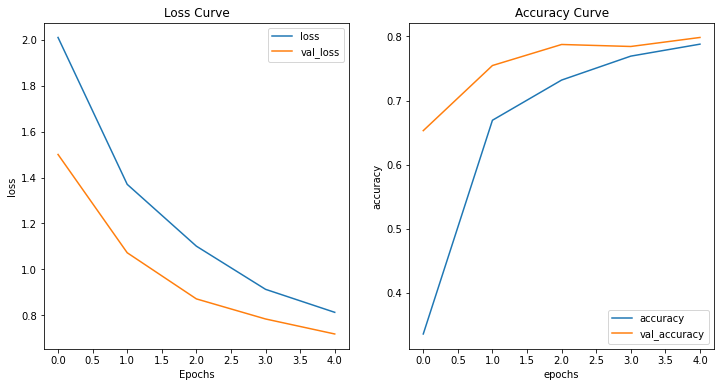

In [ ]:
plot_loss_curve(model_2_history)

## Loading in Checkpoint weights

Load in a checkpoint weights returns a model to a specific checkpoint

In [ ]:
# Load in save model weights and evaluate the model
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 130ms/step - loss: 0.6970 - accuracy: 0.8100


[0.6969881653785706, 0.8100000023841858]

In [ ]:
# import numpy as np

# np.isclose(np.array(a), np.array(b))

##166).`model_3`: use fine-tuning transfer learning on 10% of the training data and data augmentation

> **NOTE:** Fine tuning usually works best after training a feature extraction model for a few epochs with large amount of custom data



In [ ]:
# layers of the loaded model
model_2.layers

In [ ]:
# Are these layes trainable
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fe226e8a990> True
<keras.engine.sequential.Sequential object at 0x7fe224671310> True
<keras.engine.functional.Functional object at 0x7fe224259090> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7fe2244e6dd0> True
<keras.layers.core.Dense object at 0x7fe22421d490> True


In [ ]:
# What layera are there in our base_model(EfficicentNetB0)? Are they trainable
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# how many trainable variables in our base model
print(model_2.layers[2].trainable_variables)

[<tf.Variable 'block7a_se_reduce/kernel:0' shape=(1, 1, 1152, 48) dtype=float32, numpy=
array([[[[-0.05485657,  0.07178846,  0.01534605, ..., -0.09284662,
           0.0104828 , -0.02693838],
         [-0.03157939,  0.02819107, -0.05579546, ...,  0.00487578,
           0.12001809, -0.06901816],
         [-0.07792544,  0.12601745,  0.03935236, ...,  0.03086486,
          -0.01581392,  0.1306234 ],
         ...,
         [-0.07692936,  0.19920062,  0.17471024, ...,  0.03312391,
          -0.04528928, -0.09214652],
         [ 0.01010198,  0.06855008,  0.05820991, ...,  0.00131649,
          -0.08952942, -0.00476829],
         [ 0.03583075, -0.01228165,  0.04561347, ..., -0.00822134,
          -0.07354517, -0.06507882]]]], dtype=float32)>, <tf.Variable 'block7a_se_reduce/bias:0' shape=(48,) dtype=float32, numpy=
array([-0.10886215, -0.13624744, -0.15257476,  0.14799541, -0.08512902,
       -0.12059905, -0.08779966, -0.08187538, -0.06925284, -0.12518929,
       -0.0819265 , -0.1259736 , -0.

In [ ]:
# to begin fine tuning lets begin by setting the last 10 layers of our base_model.trainable = True
base_model.trainable = True

# Freeze all the layers expect for last 10 layers
for layers in base_model.layers[:-10]:
  layers.trainable = False

# recompile (we have to recompile everytime we make a change)
model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.0001), # when fine tunind you typically want to lower the learning rate 10x tims (recommended)
    metrics = ["accuracy"]
)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


> **Note** when using fine tuning its best practice to lower your learning rate by some amount. how much? this is a hyper-parameter you can tune but a good rule of thumb is at least 10x

In [ ]:
# check which layers are tuneable
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
len(model_2.trainable_variables)

12

In [ ]:
initial_epochs = 5

# fine tune for another 5 epochs
fine_tune_epoch = initial_epochs + 5

# fit the model (same as model_2 expect for more trainable layers)
model_2_history_fine_tune = model_2.fit(train_data,
                                        epochs=fine_tune_epoch,
                                        steps_per_epoch=len(train_data),
                                        validation_data=test_data,
                                        validation_steps=(0.25*len(test_data)),
                                        initial_epoch=model_2_history.epoch[-1], # start at the last epoch
                                        callbacks=tensorboard_callback("tensorboard_hub",
                                                                       "model_3_fine_tune")) 

Saving model logs to tensorboard_hub/model_3_fine_tune/210824 - Aug081629804414
Epoch 5/10
24/24 [==============================] - 26s 726ms/step - loss: 0.6911 - accuracy: 0.8067 - val_loss: 0.6007 - val_accuracy: 0.8000
Epoch 6/10
24/24 [==============================] - 15s 595ms/step - loss: 0.5952 - accuracy: 0.8213 - val_loss: 0.5399 - val_accuracy: 0.8156
Epoch 7/10
24/24 [==============================] - 13s 505ms/step - loss: 0.5176 - accuracy: 0.8427 - val_loss: 0.5587 - val_accuracy: 0.7969
Epoch 8/10
24/24 [==============================] - 14s 598ms/step - loss: 0.4713 - accuracy: 0.8507 - val_loss: 0.5627 - val_accuracy: 0.8047
Epoch 9/10
24/24 [==============================] - 15s 589ms/step - loss: 0.4523 - accuracy: 0.8613 - val_loss: 0.5555 - val_accuracy: 0.8047
Epoch 10/10
24/24 [==============================] - 13s 547ms/step - loss: 0.4073 - accuracy: 0.8800 - val_loss: 0.5575 - val_accuracy: 0.8016


In [ ]:
model_3_fine_tune_result = model_2.evaluate(test_data)

79/79 [==============================] - 11s 128ms/step - loss: 0.4918 - accuracy: 0.8368


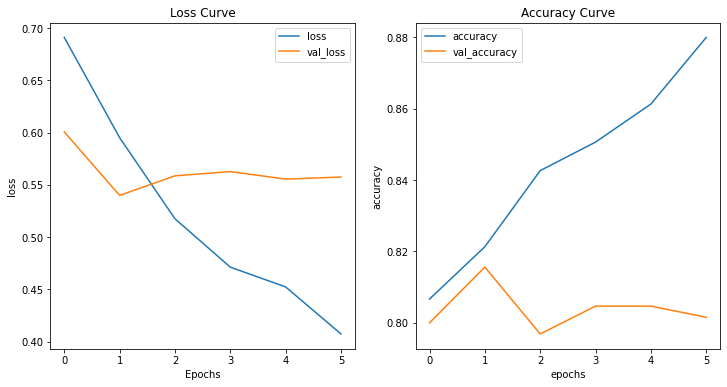

In [ ]:
plot_loss_curve(model_2_history_fine_tune)

## Compare_history()

In [ ]:
def compare_histroy(original_history, new_history, initial_epochs=5):
  """
  Compares the history of original model and the fine tunned modl
  """

  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]
  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]
  total_val_loss = val_loss + new_history.history["val_loss"]
  total_val_acc = val_acc + new_history.history["val_accuracy"]

  plt.figure(figsize=(8,8))
  # Make accuracy plot
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="accuracy")
  plt.plot(total_val_acc, label="val_acc")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tune")
  plt.legend(loc="lower right")
  plt.title("Accuracy Curve")

  # Make loss plot
  plt.subplot(2,1,2)
  plt.plot(total_loss, label="loss")
  plt.plot(total_val_loss, label="val_loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tune")
  plt.legend(loc="upper right")
  plt.title("Loss Curve")

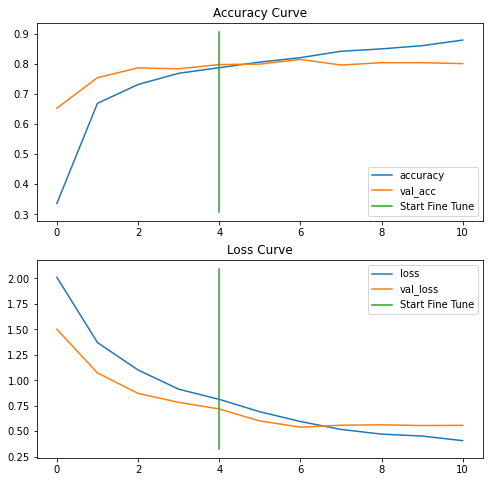

In [ ]:
compare_histroy(model_2_history,
                model_2_history_fine_tune,
                initial_epochs=5)

## 169).`model_4`: use fine-tuning transfer learning on 100% of the training data and data augmentation 

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-08-24 12:16:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  70.1MB/s    in 7.5s    

2021-08-24 12:16:18 (65.7 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
unzip_file("10_food_classes_all_data.zip")

In [ ]:
# walk throught the directories
wallk_through("10_food_classes_all_data")

There are 0 imaegs in '10_food_classes_all_data'
There are 0 imaegs in '10_food_classes_all_data/train'
There are 750 imaegs in '10_food_classes_all_data/train/pizza'
There are 750 imaegs in '10_food_classes_all_data/train/fried_rice'
There are 750 imaegs in '10_food_classes_all_data/train/grilled_salmon'
There are 750 imaegs in '10_food_classes_all_data/train/steak'
There are 750 imaegs in '10_food_classes_all_data/train/sushi'
There are 750 imaegs in '10_food_classes_all_data/train/chicken_curry'
There are 750 imaegs in '10_food_classes_all_data/train/hamburger'
There are 750 imaegs in '10_food_classes_all_data/train/ramen'
There are 750 imaegs in '10_food_classes_all_data/train/chicken_wings'
There are 750 imaegs in '10_food_classes_all_data/train/ice_cream'
There are 0 imaegs in '10_food_classes_all_data/test'
There are 250 imaegs in '10_food_classes_all_data/test/pizza'
There are 250 imaegs in '10_food_classes_all_data/test/fried_rice'
There are 250 imaegs in '10_food_classes_all_

In [ ]:
# setup train and test dir
train_dir = "10_food_classes_all_data/train"
test_data = "10_food_classes_all_data/test"

In [ ]:
# setup train and test data loader
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

all_train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")
all_test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMAGE_SIZE,
                                                                batch_size=BATCH_SIZE,
                                                                label_mode="categorical")

NameError: ignored

To train a fine_tuning model(model_2) we have to revert the model_2 back to its feature extraction weights.

>How to revert our model back?

Using the model checkpoint that we have saved

In [ ]:
model_3_fine_tune_result

In [ ]:
# load weights from model checkpoint
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(test_data)

1. Train a feature extraction model for 5 epochs on 10% of the data with data augmentation(model_2) and we saved the model weights using `Checkpoint` callback
2. fine tuned the same model on the same 10% of the data for a further 5 epochs with the top 10 layers of the base_model unfrozen(model_3).
3. Saved the results and training logs each time
4. Reload the model from step 1 to do the same steps as step 2 except this time we are going to use all the data(model_4).

In [ ]:
# check which layer are tuneable in the whole model
for i, layer in enumerate(model_2.layers):
  print(i, layer_n)